<a href="https://colab.research.google.com/github/vishalkandukuri97/AI-ML-Projects/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train: (60000, 28, 28) (60000,)
Test: (10000, 28, 28) (10000,)


In [4]:
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0


In [5]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)


In [6]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
history = model.fit(X_train, y_train_cat,
                    validation_split=0.1,
                    epochs=5,
                    batch_size=128,
                    verbose=1)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8174 - loss: 0.6531 - val_accuracy: 0.9575 - val_loss: 0.1430
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9524 - loss: 0.1605 - val_accuracy: 0.9700 - val_loss: 0.1060
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9687 - loss: 0.1040 - val_accuracy: 0.9703 - val_loss: 0.0991
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9775 - loss: 0.0749 - val_accuracy: 0.9747 - val_loss: 0.0871
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9830 - loss: 0.0576 - val_accuracy: 0.9737 - val_loss: 0.0852


In [8]:
loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {acc:.4f}")


Test Accuracy: 0.9755


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


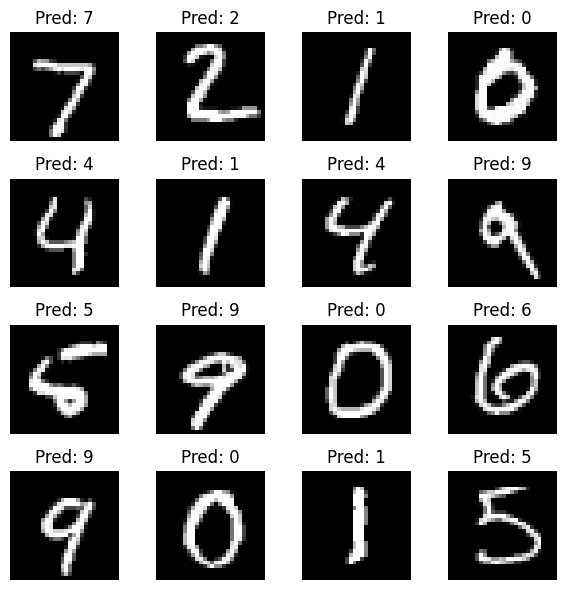

In [9]:
y_pred = model.predict(X_test[:16])
y_pred_classes = np.argmax(y_pred, axis=1)

plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_test[i], cmap="gray")
    plt.title(f"Pred: {y_pred_classes[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()
